In [1]:

# Import Libraries
import pandas as pd
import re
import string
import swifter
from tqdm import tqdm
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Setup NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Tweets.csv')
df = df[df['airline_sentiment'] != 'neutral']
df['Sentiment'] = df['airline_sentiment'].map({'positive': 1, 'negative': 0})
df['Text'] = df['text']
df = df[['Text', 'Sentiment']].dropna()


In [3]:
df.describe()

,Sentiment
count,11541.000000
mean,0.204748
std,0.403535
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
# Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|<.*?>|[^a-zA-Z]", " ", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return " ".join([word for word in text.split() if word not in stop_words])


In [5]:
# Apply Preprocessing
df['Cleaned_Text'] = df['Text'].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/11541 [00:00<?, ?it/s]

In [6]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Text'])  # sparse matrix
y = df['Sentiment']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
sentiment_model = LogisticRegression()
sentiment_model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

 Test Accuracy: 0.9038544824599394
 Train Accuracy: 0.9241767764298093

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1862
           1       0.90      0.57      0.70       447

    accuracy                           0.90      2309
   macro avg       0.90      0.78      0.82      2309
weighted avg       0.90      0.90      0.89      2309



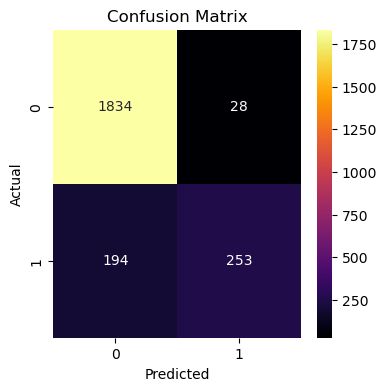

In [8]:
# Evaluate Model
print(" Test Accuracy:", accuracy_score(y_test, y_pred))
print(" Train Accuracy:", model.score(X_train, y_train))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Real-Time Prediction Function
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec_sentiment = vectorizer.transform([cleaned])
    prediction = sentiment_model.predict(vec_sentiment)[0]
    return "Positive :-)" if prediction == 1 else "Negative :-("


In [10]:
# Define a function to preprocess and predict a single review
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = sentiment_model.predict(vectorized)[0]
    return "Positive" if prediction == 1 else "Negative"

# Sample airline-related tweets
sample_reviews = [
    "I had a great flight today @United!",
    "Flight delayed for 5 hours and no compensation offered. Very disappointed. Never flying @AmericanAir again!"
]

# Predict sentiment for each sample
for i, review in enumerate(sample_reviews, 1):
    print(f"\nSample Tweet {i}: \n{review}")
    print("Predicted Sentiment:", predict_sentiment(review))



Sample Tweet 1: 
I had a great flight today @United!
Predicted Sentiment: Positive

Sample Tweet 2: 
Flight delayed for 5 hours and no compensation offered. Very disappointed. Never flying @AmericanAir again!
Predicted Sentiment: Negative
